## Ensemble Methods

### Problem statement : Build a model theat predicts the loan status of the applicant considering different factors like Age,Income,Credit history etc

### Step 1 : Data Gathering

In [1]:
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
path = r'https://raw.githubusercontent.com/sindhura-nk/Datasets/refs/heads/main/train_loan.csv'
df = pd.read_csv(path)
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


### Step 2 : Perform basic data quality checks

In [3]:
df.shape

(58645, 13)

In [4]:
df.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [6]:
#missing vvalues
df.isnull().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df = df.drop_duplicates()

### Step 3 : Seperate X and Y feature

Y = Target value = Loan_status

In [9]:
df.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [10]:
X = df.drop(columns=['id','loan_status'])
Y = df[['loan_status']]

In [11]:
X.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3


In [12]:
Y.head()

,loan_status
0,0
1,0
2,0
3,0
4,0


### Step4: Data Preprocessing and Data Cleaning

In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [14]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [15]:
print(cat)

['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


In [16]:
print(con)

['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']


In [17]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore',sparse_output=False)
)

In [18]:
con_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
)

In [19]:
pre = ColumnTransformer([
    ('cat',cat_pipe,cat),
    ('con',con_pipe,con)
]).set_output(transform='pandas')

In [20]:
pre

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['person_home_ownership', 'loan_intent',
                                  'loan_grade', 'cb_person_default_on_file']),
                                ('con',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['person_age', 'person_income',
                                  'person_emp_length', 'loan_amnt',
                                  'loan_int_rate', 'loan_percent_income',
                                  'cb_person_cred_hist_length'])])

In [21]:
X_pre = pre.fit_transform(X)
X_pre.head()

,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,cat__loan_intent_DEBTCONSOLIDATION,cat__loan_intent_EDUCATION,cat__loan_intent_HOMEIMPROVEMENT,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,...,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y,con__person_age,con__person_income,con__person_emp_length,con__loan_amnt,con__loan_int_rate,con__loan_percent_income,con__cb_person_cred_hist_length
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.566200,-0.765768,-1.187200,-0.578306,0.267616,0.117378,2.031798
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,-0.920057,-0.212128,0.328047,-0.937775,0.880532,-0.973242,-0.946489
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.240196,-0.929223,0.833130,-0.578306,-0.585854,0.553626,1.039036
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.405947,0.156966,2.348377,0.500101,0.142396,0.117378,-0.201917
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,-0.920057,-0.106673,-0.682117,-0.578306,-1.238314,-0.646056,-0.698298


### Step6: SPlit the data into training and testing

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,train_size=0.8,random_state=21)

In [24]:
xtrain.head()

,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,cat__loan_intent_DEBTCONSOLIDATION,cat__loan_intent_EDUCATION,cat__loan_intent_HOMEIMPROVEMENT,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,...,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y,con__person_age,con__person_income,con__person_emp_length,con__loan_amnt,con__loan_int_rate,con__loan_percent_income,con__cb_person_cred_hist_length
49371,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.074446,-0.264855,0.075506,0.140632,0.926666,0.335502,1.039036
33104,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,-0.754307,-0.923845,0.580588,-0.758041,0.023767,0.117378,-0.698298
53030,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.571697,0.156966,-0.177035,0.931464,-0.253034,0.444564,0.790845
54909,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-0.091305,-0.370311,-0.177035,-0.578306,1.091428,-0.427932,0.294464
27249,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.571697,-0.370311,0.075506,0.050765,-0.009185,0.335502,0.294464


In [25]:
ytrain.head()

,loan_status
49371,0
33104,1
53030,0
54909,0
27249,0


In [26]:
xtest.head()

,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,cat__loan_intent_DEBTCONSOLIDATION,cat__loan_intent_EDUCATION,cat__loan_intent_HOMEIMPROVEMENT,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,...,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y,con__person_age,con__person_income,con__person_emp_length,con__loan_amnt,con__loan_int_rate,con__loan_percent_income,con__cb_person_cred_hist_length
40062,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-0.920057,0.288785,0.328047,1.039305,-0.921970,0.444564,-0.698298
30128,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-1.085808,-0.818495,0.075506,-1.117510,0.267616,-0.755118,-0.946489
34643,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.731951,1.475156,-0.429576,1.039305,1.124381,-0.318870,2.031798
39635,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,-0.422806,1.527884,-1.187200,0.500101,-1.116389,-0.646056,-0.450108
32787,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-1.085808,-1.055770,-0.682117,0.140632,2.172270,2.843926,-0.698298


In [27]:
ytest.head()

,loan_status
40062,0
30128,0
34643,0
39635,0
32787,1


### Step7.1: Model Building

### Bagging model : Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
model = RandomForestClassifier(
    n_estimators=5,
    max_depth=4,
    min_samples_leaf=2,
    min_samples_split=5,
    criterion='gini'
)
model.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=5)

In [30]:

model.score(xtrain,ytrain)

0.9277218859237787

In [31]:
model.score(xtest,ytest)

0.9271037599113309

### Hyperparameter tuning- overfitting scenario, choose the best parameters required for the model

In [32]:
params = {
    'n_estimators':[5,10,35,50,75,100,150],
    'max_depth':[3,5,7,9,11],
    'min_samples_leaf':[2,4,5,8,72],
    'min_samples_split':[2,3,4,5,6]
}

To perform hyperparameter tuning, I am considering RandomSearchCV
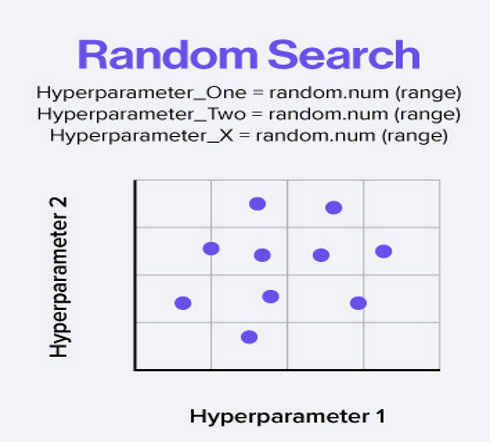

In [33]:
from sklearn.model_selection import RandomizedSearchCV

In [34]:
base_model = RandomForestClassifier()
rscv = RandomizedSearchCV(estimator=base_model,param_distributions=params,cv=3,scoring='f1_macro')
rscv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [3, 5, 7, 9, 11],
                                        'min_samples_leaf': [2, 4, 5, 8, 72],
                                        'min_samples_split': [2, 3, 4, 5, 6],
                                        'n_estimators': [5, 10, 35, 50, 75, 100,
                                                         150]},
                   scoring='f1_macro')

In [35]:
rscv.best_params_

{'n_estimators': 75,
 'min_samples_split': 3,
 'min_samples_leaf': 2,
 'max_depth': 11}

In [36]:
rscv.best_score_

np.float64(0.8834779361397059)

In [37]:
best_rfc = rscv.best_estimator_

In [38]:
best_rfc.score(xtrain,ytrain)

0.9534700315457413

In [39]:
best_rfc.score(xtest,ytest)

0.9501236252024896

### Step8: Model Evaluation

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay

In [41]:
ypred_test = model.predict(xtest)
ypred_test[:5]

array([0, 0, 1, 0, 1])

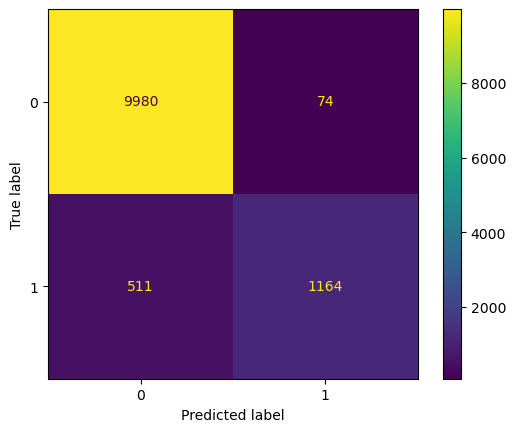

In [42]:
ConfusionMatrixDisplay.from_estimator(best_rfc,xtest,ytest)

In [43]:
from sklearn.metrics import classification_report

In [44]:
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     10054
           1       0.85      0.60      0.70      1675

    accuracy                           0.93     11729
   macro avg       0.89      0.79      0.83     11729
weighted avg       0.92      0.93      0.92     11729



## Let's build Gradient Boost and XGBoost. We shall choose the best model among these three

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

In [46]:
gbc = GradientBoostingClassifier(
    n_estimators=5,
    learning_rate= 0.01,
    max_depth= 4,
    min_samples_leaf= 3,
    min_samples_split= 5
)
gbc.fit(xtrain,ytrain)

GradientBoostingClassifier(learning_rate=0.01, max_depth=4, min_samples_leaf=3,
                           min_samples_split=5, n_estimators=5)

In [47]:
print(f"GBC Score for train: {gbc.score(xtrain,ytrain)}")

GBC Score for train: 0.8577244436865888


In [48]:
print(f"GBC Score for test: {gbc.score(xtest,ytest)}")

GBC Score for test: 0.8571915764344786


## Hyperparameter tunning
    Next step is tuning

In [49]:
params = {
    'n_estimators' : [3,5,10,15,20],
    'learning_rate' : [0.01,0.01,0.1,0.15],
    'max_depth': [3,4,5,6,7]
}

In [50]:
params

{'n_estimators': [3, 5, 10, 15, 20],
 'learning_rate': [0.01, 0.01, 0.1, 0.15],
 'max_depth': [3, 4, 5, 6, 7]}

In [51]:
base_model2 = GradientBoostingClassifier()
rscv2 = RandomizedSearchCV(estimator=base_model2,param_distributions=params,cv=3,scoring='f1_macro')
rscv2.fit(xtrain,ytrain)

RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.01, 0.1,
                                                          0.15],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'n_estimators': [3, 5, 10, 15, 20]},
                   scoring='f1_macro')

In [52]:
rscv2.best_score_

np.float64(0.862192843794373)

In [53]:
rscv2.best_params_

{'n_estimators': 5, 'max_depth': 5, 'learning_rate': 0.15}

In [54]:
best_gbc = rscv2.best_estimator_

In [55]:
best_gbc.score(xtrain,ytrain)

0.9439636797680961

In [56]:
best_gbc.score(xtest,ytest)

0.9421093017307528

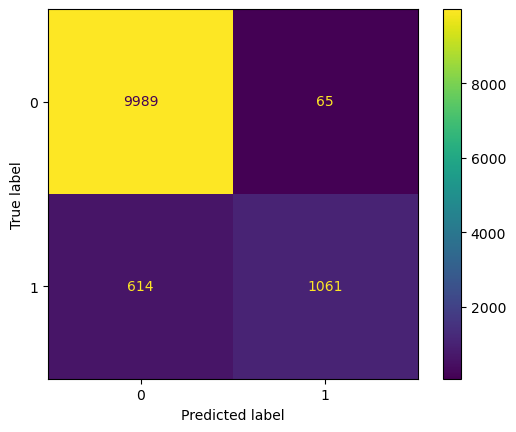

In [57]:
ConfusionMatrixDisplay.from_estimator(best_gbc,xtest,ytest)

In [58]:
ypred_test2 = best_gbc.predict(xtest)

In [59]:
print(classification_report(ytest,ypred_test2))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     10054
           1       0.94      0.63      0.76      1675

    accuracy                           0.94     11729
   macro avg       0.94      0.81      0.86     11729
weighted avg       0.94      0.94      0.94     11729



## XGBOOST

In [60]:
#pip install xgboost

### After isntallation restart the kernel

### IFF you are getting error while installing XGboost
    cd .venv/scritps
    python.exe -m ensurepip 
    pip install xgboost
    (this step is optional)

In [61]:
from xgboost import XGBClassifier

model3 = XGBClassifier(
    n_estimator=50,
    learning_rate=0.1,
    max_depth=5,
    min_samples_leaf=5,
    min_samples_split=4
)
model3.fit(xtrain,ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, min_samples_leaf=5,
              min_samples_split=4, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimator=50, ...)

In [62]:
model3.score(xtrain,ytrain)

0.9541094722482735

In [63]:
model3.score(xtest,ytest)

0.9529371642936312

### Hyperparameter tuning

In [64]:
params = {
    'n_estimator':[10,30,50,75,100,150],
    'max_depth':[5,7,10,15],
    'learning_rate':[0.001,0.01,0.015,0.1,0.15]
}

In [65]:
base_model3 = XGBClassifier()
rscv3 = RandomizedSearchCV(estimator=base_model3,param_distributions=params,cv=4,scoring='f1_macro')
rscv3.fit(xtrain,ytrain)

RandomizedSearchCV(cv=4,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   param_distributions={'learning_rate': [0.001, 0.01, 0.015,
                                                          0.1, 0.15],
                                        'max_depth': [5, 7, 10, 15],
                                        'n_estimator': [10, 30, 50, 75, 100,
                                                        150]},
                   scoring='f1_macro')

In [66]:
rscv3.best_score_

np.float64(0.891704888345723)

In [67]:
rscv3.best_params_

{'n_estimator': 50, 'max_depth': 7, 'learning_rate': 0.1}

In [68]:
best_xgb = rscv3.best_estimator_

In [69]:
best_xgb.score(xtrain,ytrain)

0.9590544803478558

In [70]:
best_xgb.score(xtest,ytest)

0.9529371642936312

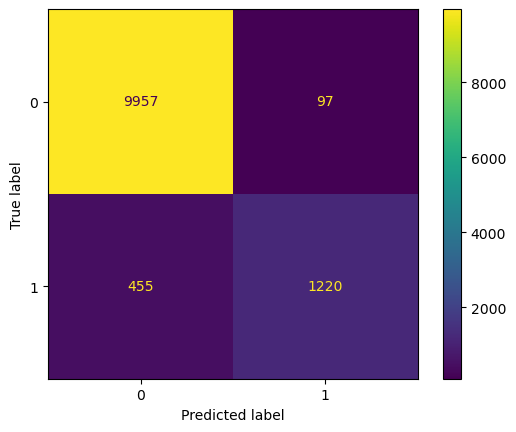

In [71]:
ConfusionMatrixDisplay.from_estimator(best_xgb,xtest,ytest)

In [72]:
ypred_test3 = best_xgb.predict(xtest)

In [74]:
print(f" Classification Report are as follows :\n {classification_report(ytest,ypred_test3)}")

 Classification Report are as follows :
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     10054
           1       0.93      0.73      0.82      1675

    accuracy                           0.95     11729
   macro avg       0.94      0.86      0.89     11729
weighted avg       0.95      0.95      0.95     11729



### ROC - Receiver Operator Characteristic: Showcases the TPR(true positive rate) vs False Positive rate over different thresholds. It helps in understanding whether the model is able to discriminate between the classes. THe model closer to left-most side, indicates high discrimination

### AUC: Area Under Curve: Focuses on the area under the curve .It represents the probability that the model will rank a randomly chosen positive instance higher than negative instance. If the area is greater than 0.80, we are good to choose the model

In [87]:
ytest['loan_status']

40062    0
30128    0
34643    0
39635    0
32787    1
        ..
42194    0
47036    0
43427    0
42222    1
12409    0
Name: loan_status, Length: 11729, dtype: int64

In [88]:
ypred_test[:5]

array([0, 0, 1, 0, 1])

In [89]:
ypred_test3[:5]

array([0, 0, 0, 0, 1])

In [90]:
ypred_test3[:5]

array([0, 0, 0, 0, 1])

In [91]:
model_results = {
    'Actual Y Data':ytest['loan_status'],
    'RandomForestClassifier':ypred_test,
    'GradientBoostingClassifier':ypred_test2,
    'XGBClassifier':ypred_test3
}
df_model_results = pd.DataFrame(model_results)
df_model_results

,Actual Y Data,RandomForestClassifier,GradientBoostingClassifier,XGBClassifier
40062,0,0,0,0
30128,0,0,0,0
34643,0,1,0,0
39635,0,0,0,0
32787,1,1,1,1
...,...,...,...,...
42194,0,0,0,0
47036,0,0,0,0
43427,0,0,0,0
42222,1,0,0,1


In [92]:
df_model_results['RandomForestClassifier']

40062    0
30128    0
34643    1
39635    0
32787    1
        ..
42194    0
47036    0
43427    0
42222    0
12409    0
Name: RandomForestClassifier, Length: 11729, dtype: int64

In [93]:
df_model_results['GradientBoostingClassifier']

40062    0
30128    0
34643    0
39635    0
32787    1
        ..
42194    0
47036    0
43427    0
42222    0
12409    0
Name: GradientBoostingClassifier, Length: 11729, dtype: int64

In [94]:
df_model_results['XGBClassifier']

40062    0
30128    0
34643    0
39635    0
32787    1
        ..
42194    0
47036    0
43427    0
42222    1
12409    0
Name: XGBClassifier, Length: 11729, dtype: int64

In [95]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt

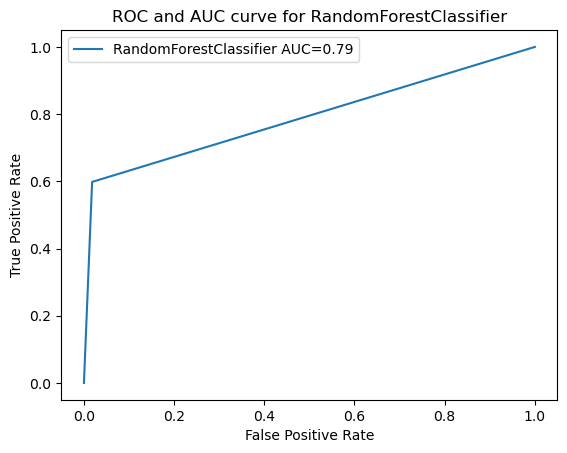

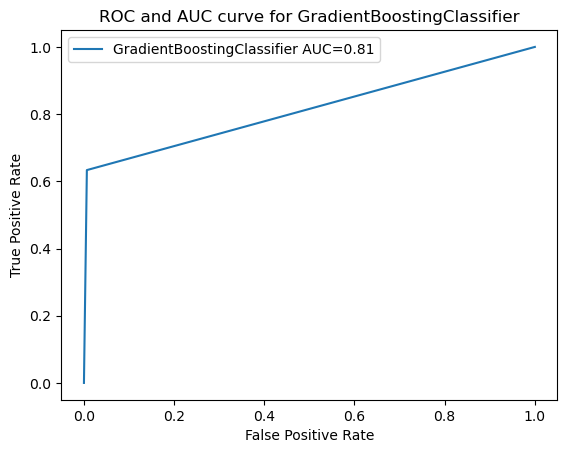

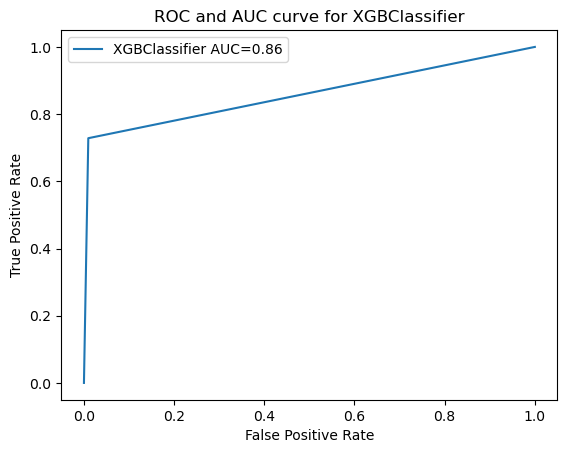

In [96]:
for model in ['RandomForestClassifier','GradientBoostingClassifier','XGBClassifier']:
    fpr,tpr,thresholds = roc_curve(ytest,df_model_results[model])
    roc_auc = auc(fpr,tpr)
    plt.plot(fpr,tpr,label=f'{model} AUC={roc_auc:.2f}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC and AUC curve for {model}')
    plt.legend()
    plt.show()

### Final Model building: XGB classifier output looks good,. we can consider this for final model building

In [75]:
df.head(2)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0


In [76]:
path2 = r'https://raw.githubusercontent.com/sindhura-nk/Datasets/refs/heads/main/test_loan.csv'
xnew = pd.read_csv(path2)
xnew.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [77]:
pre

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['person_home_ownership', 'loan_intent',
                                  'loan_grade', 'cb_person_default_on_file']),
                                ('con',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['person_age', 'person_income',
                                  'person_emp_length', 'loan_amnt',
                                  'loan_int_rate', 'loan_percent_income',
                                  'cb_person_cred_hist_length'])])

In [78]:
con

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [79]:
xnew2 = xnew.drop(columns='id')
xnew2.head(1)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2


In [80]:
xnew_pre = pre.transform(xnew2)

In [81]:
xnew_pre.head(3)

,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,cat__loan_intent_DEBTCONSOLIDATION,cat__loan_intent_EDUCATION,cat__loan_intent_HOMEIMPROVEMENT,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,...,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y,con__person_age,con__person_income,con__person_emp_length,con__loan_amnt,con__loan_int_rate,con__loan_percent_income,con__cb_person_cred_hist_length
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-0.754307,0.130602,-0.429576,2.836651,1.674687,2.189555,-0.946489
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,-0.257055,0.842425,0.328047,0.140632,0.659750,-0.646056,-0.450108
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,-0.257055,-0.897587,0.075506,-0.937775,2.145908,-0.318870,-0.946489


In [82]:
loan_status_predicted = best_xgb.predict(xnew_pre)

In [83]:
loan_status_predicted

array([1, 0, 1, ..., 0, 0, 1])

In [84]:
xnew['Predicted_Loan_Status'] = loan_status_predicted

In [85]:
xnew.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,Predicted_Loan_Status
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2,1
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4,0
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2,1
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7,0
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4,0


In [86]:
xnew.to_csv('Predicted Loan Results.csv',index=False)